In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report

In [2]:
diabet = pd.read_csv(r'C:\Users\User\Documents\hospital_diabetes_dataset.csv')

In [3]:
diabet.head()

,Pregnancies,AmountofGlucose,Pressureofblood,Thicknessofskin,amountofInsulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabet.isna().sum()

Pregnancies         0
AmountofGlucose     0
Pressureofblood     0
Thicknessofskin     0
amountofInsulin     0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64

In [5]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   AmountofGlucose   768 non-null    int64  
 2   Pressureofblood   768 non-null    int64  
 3   Thicknessofskin   768 non-null    int64  
 4   amountofInsulin   768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabet.columns = diabet.columns.str.lower()

In [10]:
diabet.columns

Index(['pregnancies', 'amountofglucose', 'pressureofblood', 'thicknessofskin',
       'amountofinsulin', 'bmi', 'diabetespedigree', 'age', 'outcome'],
      dtype='object')

# Is age relationship to diabet ?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


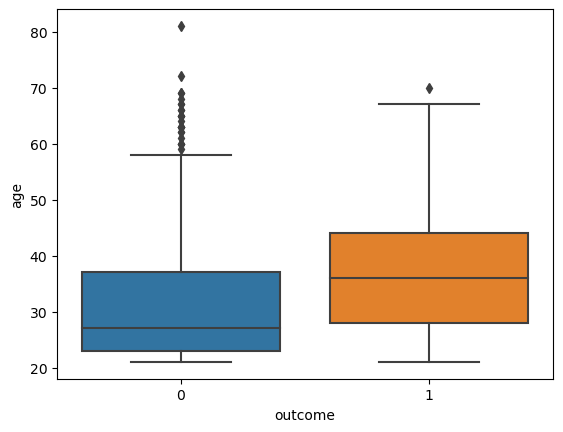

In [13]:
sns.boxplot(diabet['outcome'] , diabet['age'])
plt.show()

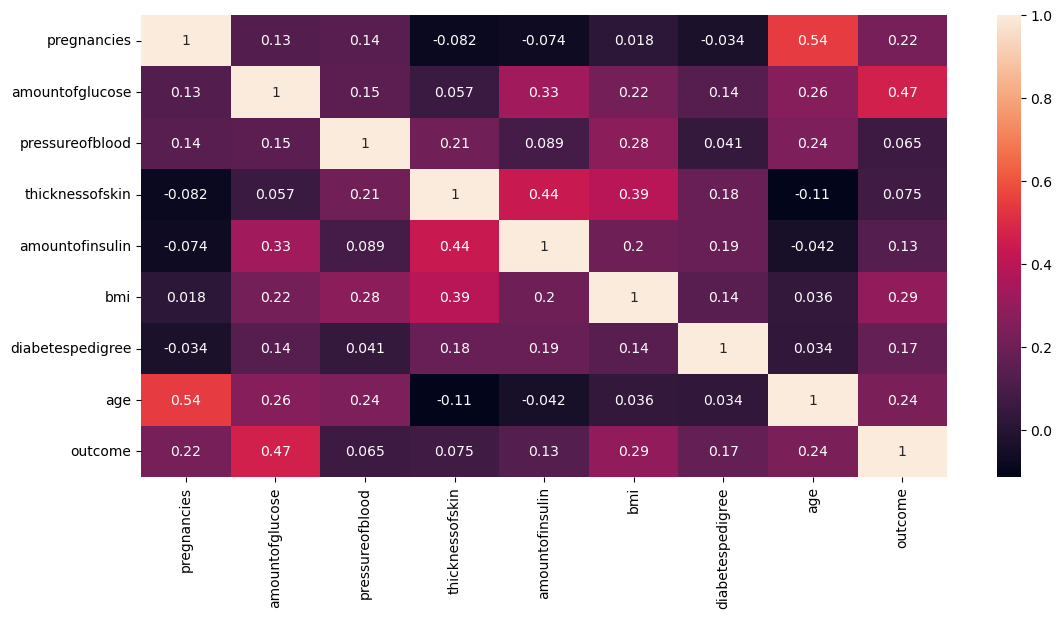

In [16]:
plt.figure(figsize = (13,6))
sns.heatmap(diabet.corr() , annot= True)
plt.show()

In [17]:
X = diabet.drop(columns = ['outcome'] , axis = 1)
Y = diabet['outcome']

In [18]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size= 0.2 , stratify= Y )

# DummyClassifier

In [19]:
dummy = DummyClassifier()

In [20]:
dummy.fit(X_train , Y_train)

DummyClassifier()

In [21]:
dummy_predict = dummy.predict(X_test)

In [22]:
print(classification_report(Y_test , dummy_predict ))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LogisticRegression

In [23]:
log = LogisticRegression(max_iter=100000)

In [24]:
log.fit(X_train , Y_train)

LogisticRegression(max_iter=100000)

In [25]:
log_predict = log.predict(X_test)

In [27]:
print(classification_report(Y_test , log_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       100
           1       0.72      0.67      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



# DecisionTreeClassifier

In [28]:
tree = DecisionTreeClassifier()
tree.fit(X_train , Y_train)

DecisionTreeClassifier()

In [29]:
tree_predict = tree.predict(X_test)

In [30]:
print(classification_report(Y_test , tree_predict))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       100
           1       0.61      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



# RandomForestClassifier

In [31]:
ran = RandomForestClassifier()
ran.fit(X_train , Y_train)
ran_predict = ran.predict(X_test)

In [32]:
print(classification_report(Y_test , ran_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       100
           1       0.73      0.69      0.70        54

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154



In [60]:
diabet_predict = pd.DataFrame({'feature': X.columns , 'importance': ran.feature_importances_} )

In [63]:
diabet_predict = diabet_predict.sort_values('importance' , ascending = False)

In [64]:
diabet_predict

,feature,importance
1,amountofglucose,0.250630
5,bmi,0.158653
7,age,0.146989
6,diabetespedigree,0.124480
2,pressureofblood,0.092115
0,pregnancies,0.084206
3,thicknessofskin,0.072575
4,amountofinsulin,0.070352
